# Single Shot Detector with Tensorflow

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 81917, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 81917 (delta 235), reused 344 (delta 215), pack-reused 81533
Receiving objects: 100% (81917/81917), 596.36 MiB | 14.23 MiB/s, done.
Resolving deltas: 100% (58424/58424), done.


In [ ]:
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=.

### Install the object detection API

In [ ]:
!cd models/research/ && cp object_detection/packages/tf2/setup.py . && python -m pip install .

##### Test installation

In [ ]:
!cd models/research/ && python object_detection/builders/model_builder_tf2_test.py 

## Import Libraries

In [ ]:
import os
import pathlib
import tensorflow as tf

import time 
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils 

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
#Dowload images
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/walkingdog.jpeg
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/traffic.jpeg
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/jungle.jpeg
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/intersection.jpeg



--2023-03-08 01:08:18--  https://lazyprogrammer.me/course_files/object_detection_images/walkingdog.jpeg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195368 (191K) [image/jpeg]
Saving to: ‘walkingdog.jpeg’

walkingdog.jpeg     100%[===================>] 190.79K   344KB/s    in 0.6s    

2023-03-08 01:08:20 (344 KB/s) - ‘walkingdog.jpeg’ saved [195368/195368]

--2023-03-08 01:08:20--  https://lazyprogrammer.me/course_files/object_detection_images/traffic.jpeg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160514 (157K) [image/jpeg]
Saving to: ‘traffic.jpeg’

traffic.jpeg        100

In [ ]:
import glob

IMAGE_PATHS = [path for path in glob.glob('*.jpeg')]
IMAGE_PATHS

['intersection.jpeg', 'walkingdog.jpeg', 'traffic.jpeg', 'jungle.jpeg']

## Download and extract model files
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [ ]:
url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz'

PATH_TO_MODEL = tf.keras.utils.get_file(fname='ssd_resnet101_v1_fpn_640x640_coco17_tpu-8',
                                        origin=url,
                                        untar = True)

386527459/386527459 [==============================] - 9s 0us/step


## Download Labels

In [ ]:
url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt'


PATH_TO_LABELS = tf.keras.utils.get_file(
    fname = 'mscoco_label_map.pbtxt',
    origin = url,
    untar = False
)

5056/5056 [==============================] - 0s 0us/step


In [ ]:
!tail {PATH_TO_LABELS}

item {
  name: "/m/03wvsk"
  id: 89
  display_name: "hair drier"
}
item {
  name: "/m/012xff"
  id: 90
  display_name: "toothbrush"
}


## Load the model

In [ ]:
PATH_TO_SAVED_MODEL = PATH_TO_MODEL + "/saved_model"

start_time = time.time()
detect__fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()

print("Done! Time: {}".format(end_time - start_time))


Done! Time: 30.376996755599976


## Load labels

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

## Helper function

In [ ]:
def load_images_into_nparray(path):
  return np.array(Image.open(path))

## Do some Object Detection

In [ ]:
def detec_objects(img_path):
  img_np = load_images_into_nparray(img_path)

  input_tensor = tf.convert_to_tensor(img_np)
  #Create tensor as a batch
  input_tensor = input_tensor[tf.newaxis, ...]

  detections = detect__fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
  detections['num_detections'] = num_detections

  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  image_np_with_detections = img_np.copy()


  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates = True,
      max_boxes_to_draw = 200,
      min_score_thresh = 0.30,
      agnostic_mode = False
    )

  plt.figure(figsize = (15,10))
  plt.imshow(image_np_with_detections)
  plt.axis('off')
  plt.show()

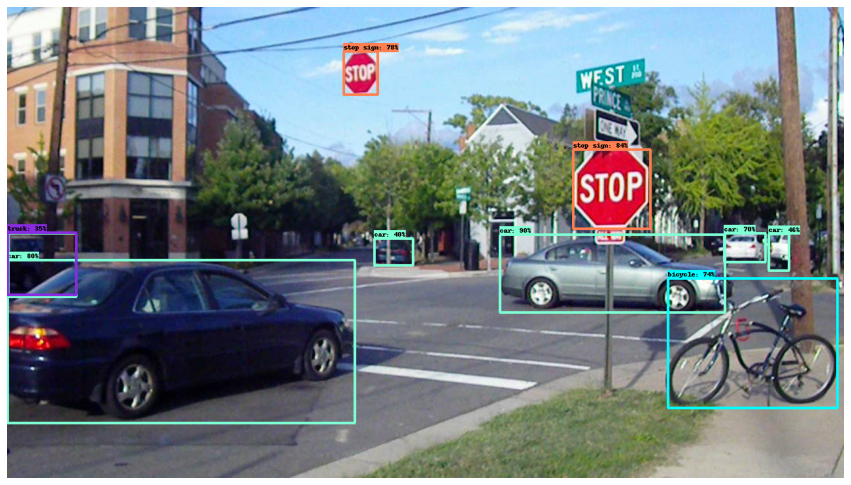

In [ ]:
detec_objects(IMAGE_PATHS[0])

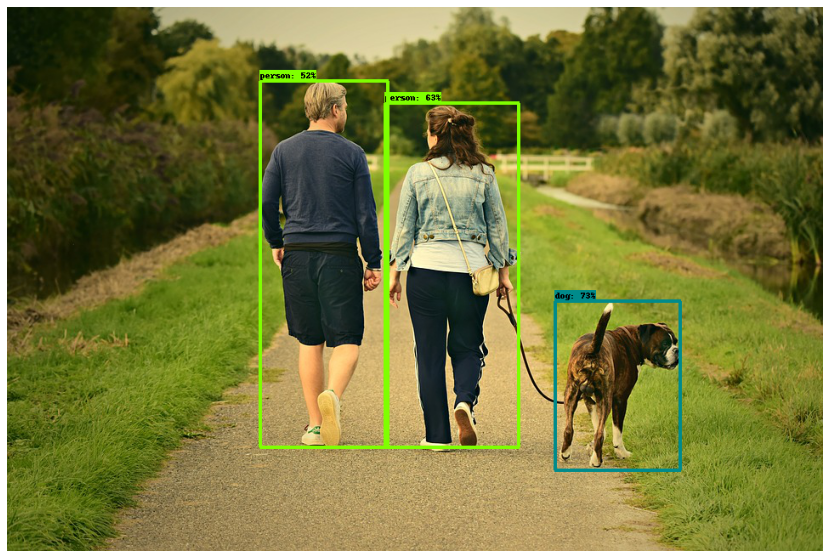

In [ ]:
detec_objects(IMAGE_PATHS[1])

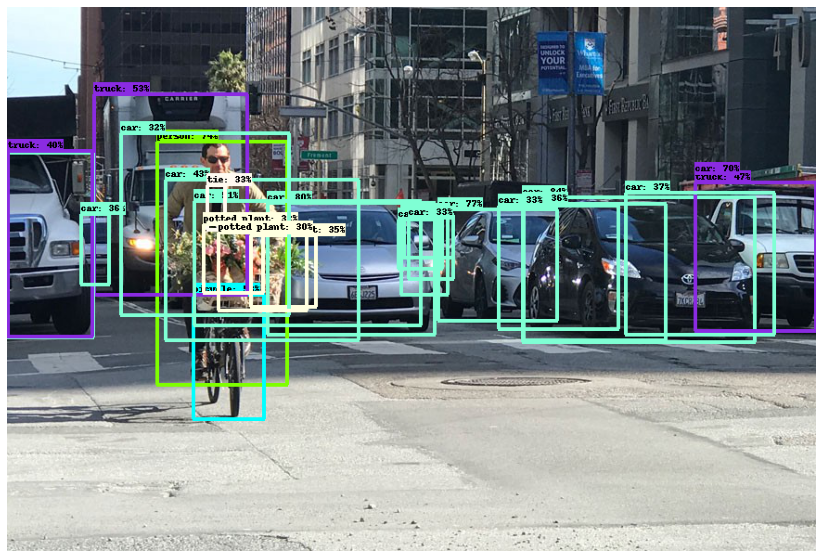

In [ ]:
detec_objects(IMAGE_PATHS[2])

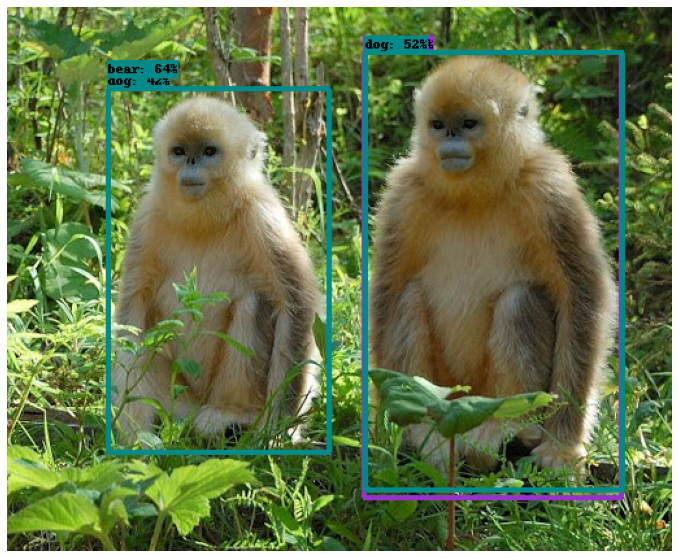

In [ ]:
detec_objects(IMAGE_PATHS[3])